### <font color="brown">This notebook is not focused in developing inferences using DBSCAN clustering algorithm or using DBSCAN algorithm to solve a business scenario. </font>

### <font color="brown">This notebook specifically focuses on evaluation of a clustering algorithm if it's anything other than KMeans using: </font>

<h2 align="center"><font color="brown"> 1. Elbow Method </font></h2>
<h2 align="center"><font color="brown"> 2. Silhouette Score and Silhouette Analysis Plots </font></h2>

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data.
dataframe=pd.read_csv('Mall_Customers.csv')
dataframe.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Since Annual Income and Spending Score are the only variables to be considered:
df_ml=dataframe.iloc[:, [3,4]].values
df_ml

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Model training:

In [4]:
object=DBSCAN(eps=13, min_samples=15)
model=object.fit(df_ml)

#labels addresses the cluster id.
labels=model.labels_

In [5]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  1,  3,  1,  3,  2,  3,  2,  3,  1,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  1,  3,  2,  3,  1,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  1,  3,  2,  3,  2,  3,  2,  3,  2, -1,
        2,  3,  2,  3,  2,  3,  2,  3,  2,  3, -1,  3,  2,  3, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

#### Here -1 means that these points are outliers.

### Identifying indexes which makes our core points

In [6]:
sample_cores=np.zeros_like(labels, dtype=bool)
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
sample_cores[model.core_sample_indices_]=True
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,

In [8]:
#number of clusters is given by:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

4

In [9]:
#Calculating Silhouette Score:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_ml, labels))

0.367676415477805


In [10]:
#Assigning the cluster ids to the dataframe:
dataframe['clusters']=labels
dataframe

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [11]:
#Finding percentage of outliers formed by the clustering.
(dataframe[dataframe['clusters']==-1]['clusters'].count()/dataframe.shape[0])*100

22.0

In [12]:
#Number of datapoints assigned to each cluster.
dataframe.clusters.value_counts()

 1    87
-1    44
 3    31
 2    23
 0    15
Name: clusters, dtype: int64

In [13]:
# Mapping cluster ids as names:
dataframe['Group']=dataframe.clusters.map({-1:'No Group', 0:'Group A', 1:'Group B', 2:'Group C',
                                          3:'Group D', 4:'Group E', 5:'Group F', 6:'Group G'})
dataframe.drop('clusters', axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,No Group
1,2,Male,21,15,81,Group A
2,3,Female,20,16,6,No Group
3,4,Female,23,16,77,Group A
4,5,Female,31,17,40,No Group
...,...,...,...,...,...,...
195,196,Female,35,120,79,No Group
196,197,Female,45,126,28,No Group
197,198,Male,32,126,74,No Group
198,199,Male,32,137,18,No Group


### Visualizing each cluster

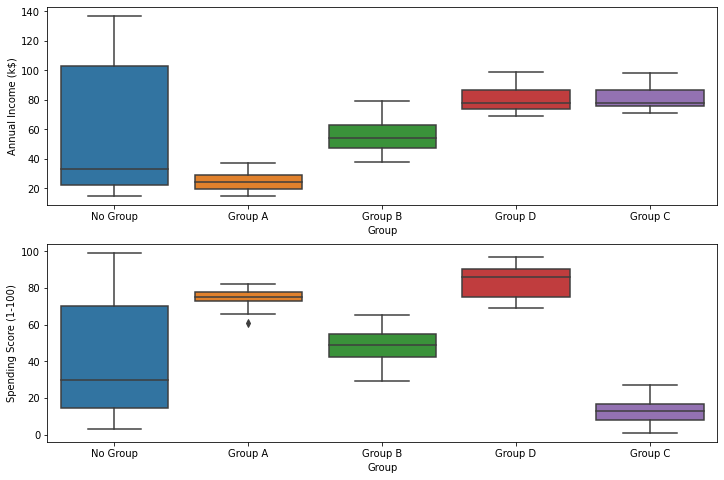

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(x='Group', y='Annual Income (k$)', data=dataframe)
plt.subplot(2,1,2)
sns.boxplot(x='Group', y='Spending Score (1-100)', data=dataframe)
plt.show()

# Model Validation

### Elbow Method

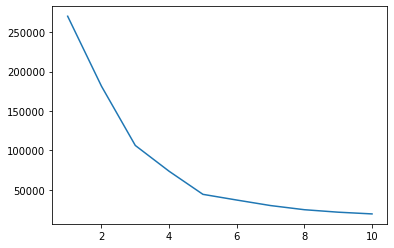

In [15]:
#plotting within cluster sum of squares for different values of k
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=20)
    kmeans.fit(df_ml)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)

### Silhouette Score and Silhoutte coefficient graphs

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.53976103063432
For n_clusters = 7 The average silhouette_score is : 0.5264283703685728
For n_clusters = 8 The average silhouette_score is : 0.459295844567539
For n_clusters = 9 The average silhouette_score is : 0.4595491760122954
For n_clusters = 10 The average silhouette_score is : 0.4509237544334418
For n_clusters = 11 The average silhouette_score is : 0.43560008750473395


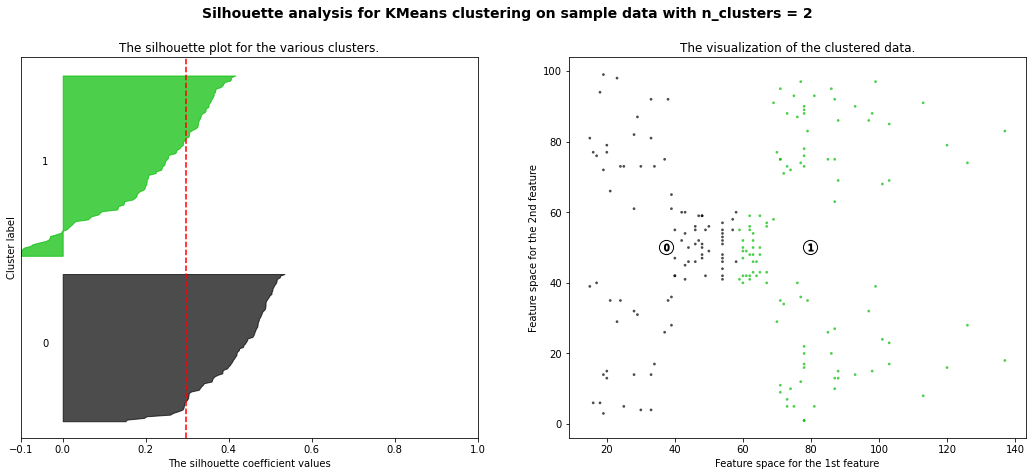

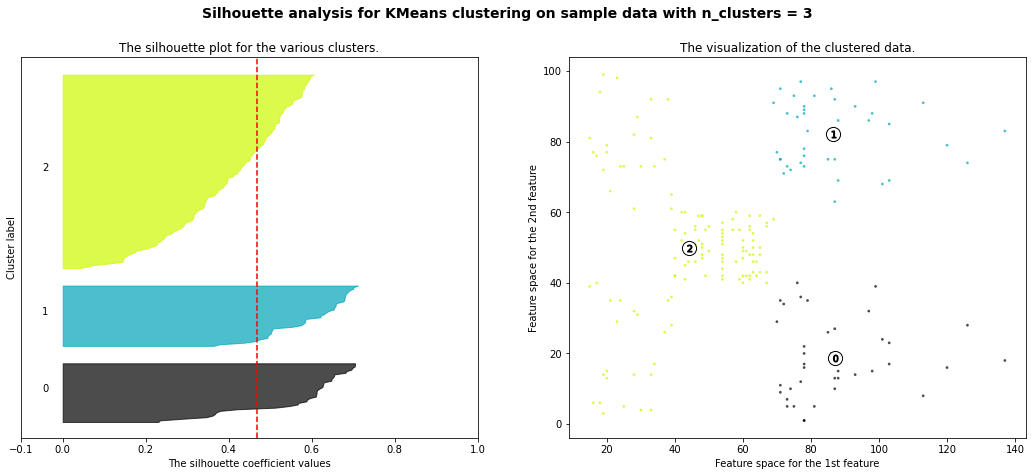

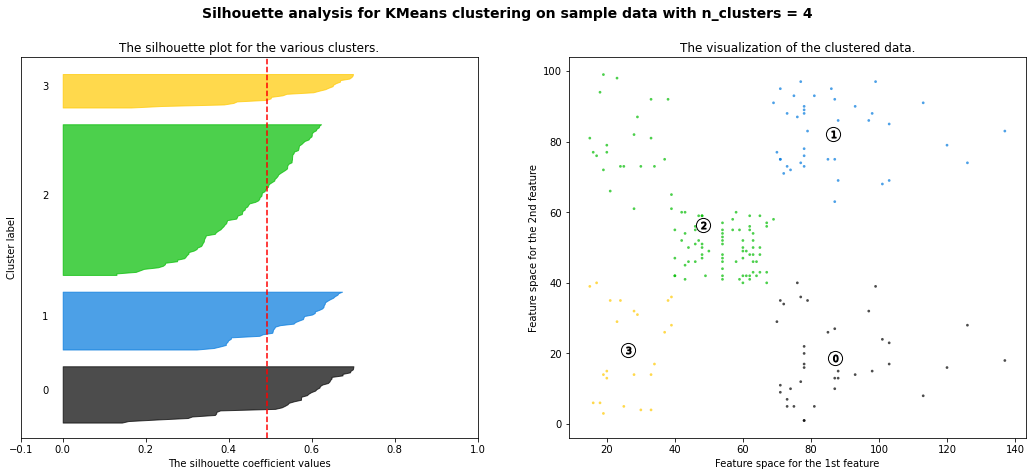

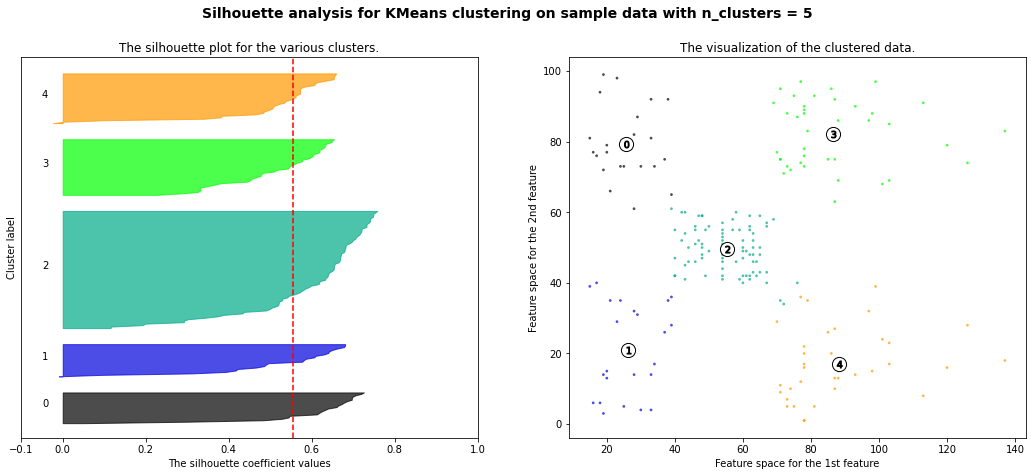

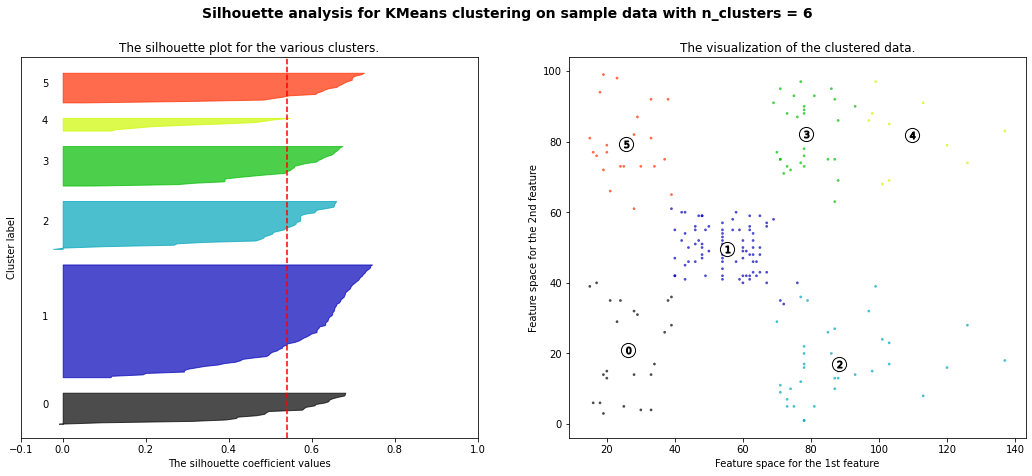

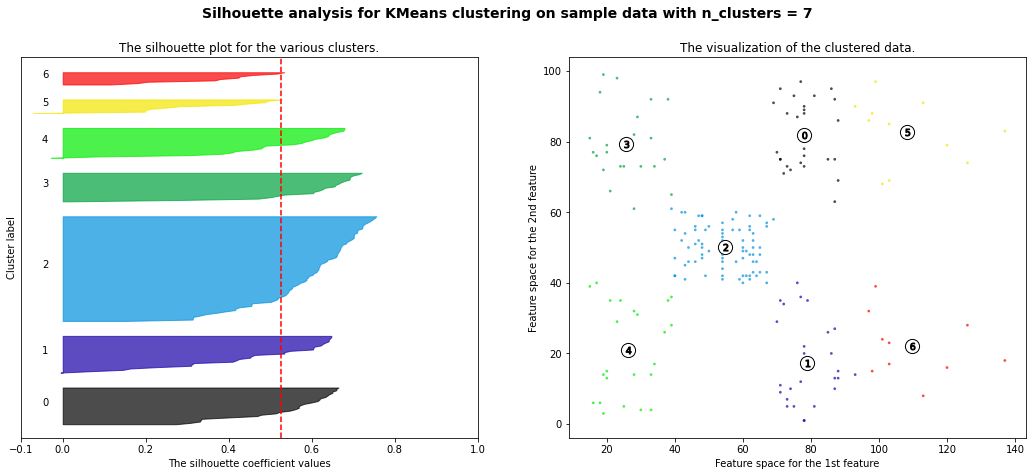

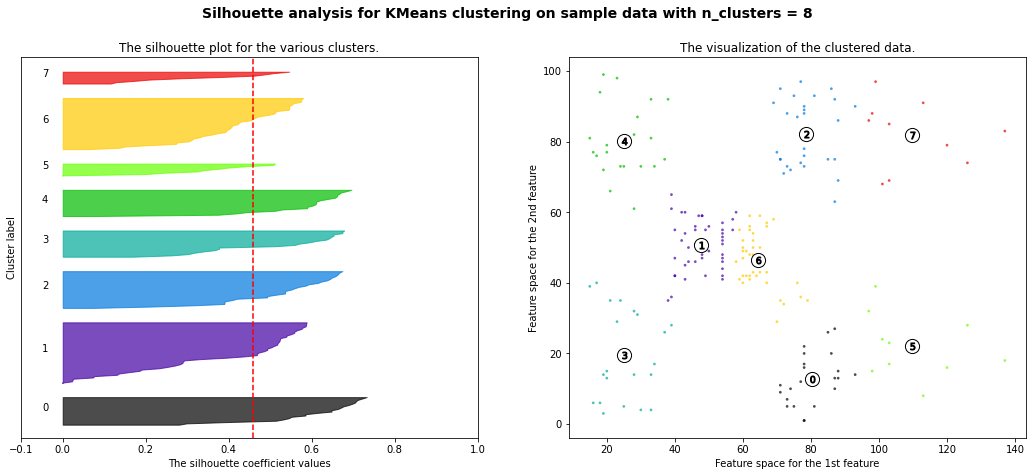

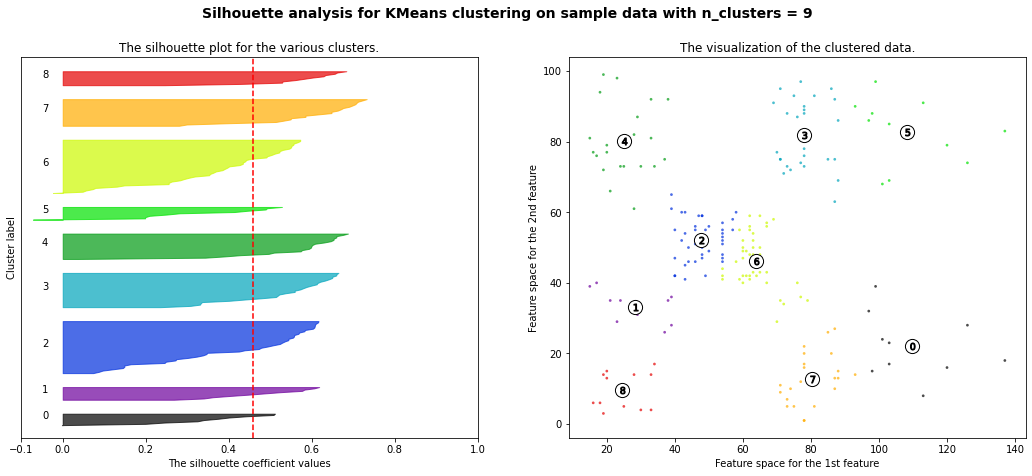

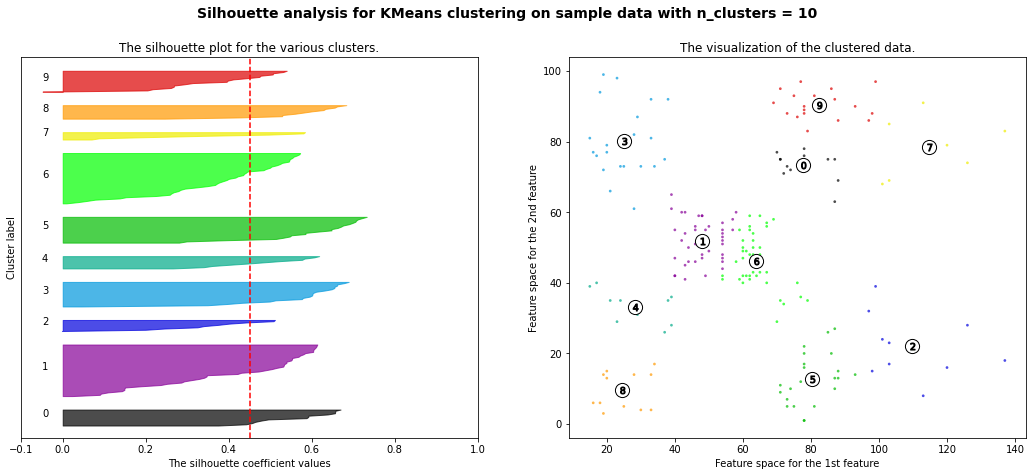

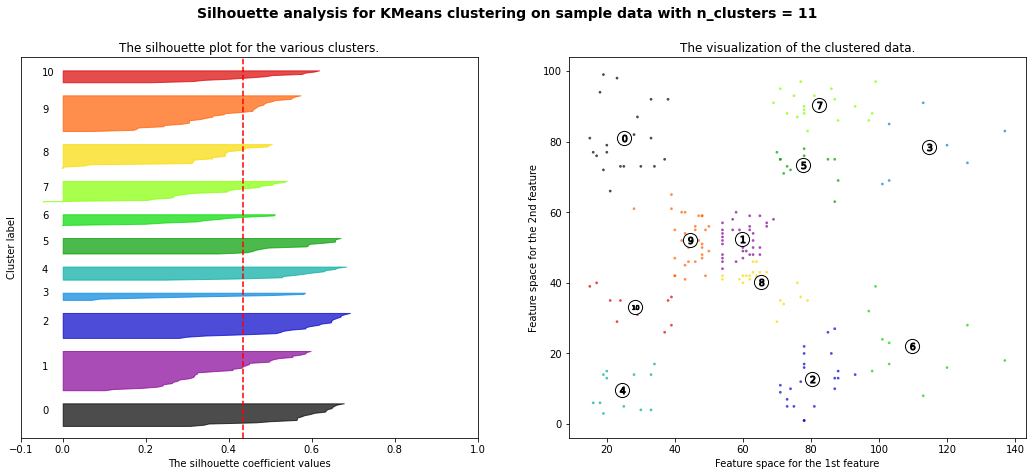

In [16]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_ml) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20)
    cluster_labels = clusterer.fit_predict(df_ml)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_ml, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_ml, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_ml[:, 0], df_ml[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### <font color="brown"> From the increasing Silhoutte scores and Silhouette coefficient graphs where the coefficient is greater than 0, it can be determined that the optimum number of clusters is 4. The elbow method suggests the same. </font>
### <font color="brown"> And the maximum silhouette score obtained with 4 clusters using DBSCAN was 4. </font>
### <font color="brown"> Hence on Evaluation it can be determined that the clustering done by DBSCAN is optimized. </font>